In [1]:
import numpy as np
from numpy import cos, sin
from numpy import sqrt
import time
from scipy.sparse.linalg import expm
import pandas as pd

label_size = 20


# In[2]:



import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""


from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numpy import sin, cos

T0=time.time()


# In[3]:



from numpy import random, zeros, sqrt,cos,sin

import numpy as np

import numbers

from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real



from scipy.linalg import norm
from numpy import dot

from numpy import pi as pi
from numpy import array

import scipy

from numpy import exp, imag, real,zeros, conj
from numpy import sum
from scipy import sparse
from numpy import array
import scipy.sparse as sp
from numpy import concatenate

from scipy.sparse import csr_matrix
from numpy import sqrt, dot
from numpy.random import choice
from numpy.random import normal
from numpy import sqrt


from numpy import add
from numpy import concatenate
from scipy.sparse import coo_matrix

from scipy.sparse import kron

#t0=time.time()

import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
from scipy.sparse import kron
from scipy.sparse import coo_matrix, identity



# \begin{align}
# \hat{H}_{{\rm MACE}}^{i} & =\sum_{k\in C_{i}}B_{Q}\hat{s}_{z,k}^{2}+\sum_{\substack{j,k\in C_{i},\\
# j<k
# }
# }V_{jk}\left(\hat{s}_{z,j}\hat{s}_{z,k}-\frac{1}{2}\left(\hat{s}_{x,j}\hat{s}_{x,k}+\hat{s}_{y,j}\hat{s}_{y,k}\right)\right).
# \end{align}
# 



In [2]:
Vm=array([[ 0.        ,1.1726507 , -0.14658133, -1.1726507],
       [1.1726507 ,  0.        , -1.1726507 , -0.74658133],
       [-0.14658133, -1.1726507 ,  0.        , -1.1726507 ],
       [-1.1726507 , -0.74658133, -1.1726507 ,  0.    ]])*2

In [3]:
import numpy as np
from scipy.integrate import solve_ivp

In [4]:
Orders=array([[0,1,2,3],
              [1,2,3,0],
              [2,3,0,1],
              [3,0,1,2]])

In [5]:
def sip(a,b,c,d):
    
    return abs(a)**2+abs(b)**2-abs(c)**2-abs(d)**2

In [6]:
def Solver_SE(t, z):
    
    a00,a01,a10,a11,b00,b01,b10,b11,c00,c01,c10,c11,d00,d01,d10,d11 = z
    
    dfdt=np.zeros((1,16))
    
    sigmaz0=sip(a00,a01,a10,a11)
    sigmaz1=sip(b00,b01,b10,b11)
    sigmaz2=sip(c00,c01,c10,c11)
    sigmaz3=sip(d00,d01,d10,d11)
    
    dfdt[:,0 ]   =  Vm[0,1]+ ( Vm[0,2]+Vm[1,2])*sigmaz2 + ( Vm[0,3]+Vm[1,3])*sigmaz3
    dfdt[:,1 ]   = -Vm[0,1]+ ( Vm[0,2]-Vm[1,2])*sigmaz2 + ( Vm[0,3]-Vm[1,3])*sigmaz3
    dfdt[:,2 ]   = -Vm[0,1]+ (-Vm[0,2]+Vm[1,2])*sigmaz2 + (-Vm[0,3]+Vm[1,3])*sigmaz3
    dfdt[:,3 ]   =  Vm[0,1]+ (-Vm[0,2]-Vm[1,2])*sigmaz2 + (-Vm[0,3]-Vm[1,3])*sigmaz3
    
    dfdt[:,4 ]   =  Vm[1,2]+ ( Vm[1,3]+Vm[2,3])*sigmaz3 + ( Vm[1,0]+Vm[2,0])*sigmaz0
    dfdt[:,5 ]   = -Vm[1,2]+ ( Vm[1,3]-Vm[2,3])*sigmaz3 + ( Vm[1,0]-Vm[2,0])*sigmaz0
    dfdt[:,6 ]   = -Vm[1,2]+ (-Vm[1,3]+Vm[2,3])*sigmaz3 + (-Vm[1,0]+Vm[2,0])*sigmaz0
    dfdt[:,7 ]   =  Vm[1,2]+ (-Vm[1,3]-Vm[2,3])*sigmaz3 + (-Vm[1,0]-Vm[2,0])*sigmaz0
    
    dfdt[:,8 ]   =  Vm[2,3]+ ( Vm[2,0]+Vm[3,0])*sigmaz0 + ( Vm[2,1]+Vm[3,1])*sigmaz1
    dfdt[:,9 ]   = -Vm[2,3]+ ( Vm[2,0]-Vm[3,0])*sigmaz0 + ( Vm[2,1]-Vm[3,1])*sigmaz1
    dfdt[:,10]   = -Vm[2,3]+ (-Vm[2,0]+Vm[3,0])*sigmaz0 + (-Vm[2,1]+Vm[3,1])*sigmaz1
    dfdt[:,11]   =  Vm[2,3]+ (-Vm[2,0]-Vm[3,0])*sigmaz0 + (-Vm[2,1]-Vm[3,1])*sigmaz1
    
    dfdt[:,12]   =  Vm[3,0]+ ( Vm[3,1]+Vm[0,1])*sigmaz1 + ( Vm[3,2]+Vm[0,2])*sigmaz2
    dfdt[:,13]   = -Vm[3,0]+ ( Vm[3,1]-Vm[0,1])*sigmaz1 + ( Vm[3,2]-Vm[0,2])*sigmaz2
    dfdt[:,14]   = -Vm[3,0]+ (-Vm[3,1]+Vm[0,1])*sigmaz1 + (-Vm[3,2]+Vm[0,2])*sigmaz2
    dfdt[:,15]   =  Vm[3,0]+ (-Vm[3,1]-Vm[0,1])*sigmaz1 + (-Vm[3,2]-Vm[0,2])*sigmaz2
    
   
     
    return 0.25*((-1j*dfdt) * z)[0]

In [7]:
def Matrix_SE0(t, z):
    
    a00,a01,a10,a11,b00,b01,b10,b11,c00,c01,c10,c11,d00,d01,d10,d11 = z
    
    dfdt=np.zeros((1,16))
    
    sigmaz0=sip(a00,a01,a10,a11)
    sigmaz1=sip(b00,b01,b10,b11)
    sigmaz2=sip(c00,c01,c10,c11)
    sigmaz3=sip(d00,d01,d10,d11)
    
    P00   =  Vm[0,1]+ ( Vm[0,2]+Vm[1,2])*sigmaz2 + ( Vm[0,3]+Vm[1,3])*sigmaz3
    P01   = -Vm[0,1]+ ( Vm[0,2]-Vm[1,2])*sigmaz2 + ( Vm[0,3]-Vm[1,3])*sigmaz3
    P10   = -Vm[0,1]+ (-Vm[0,2]+Vm[1,2])*sigmaz2 + (-Vm[0,3]+Vm[1,3])*sigmaz3
    P11   =  Vm[0,1]+ (-Vm[0,2]-Vm[1,2])*sigmaz2 + (-Vm[0,3]-Vm[1,3])*sigmaz3

     
    return np.diag((P00,P01,P10,P11))/4

In [8]:
def Matrix_SE1(t, z):
    
    a00,a01,a10,a11,b00,b01,b10,b11,c00,c01,c10,c11,d00,d01,d10,d11 = z
    
    dfdt=np.zeros((1,16))
    
    sigmaz0=sip(a00,a01,a10,a11)
    sigmaz1=sip(b00,b01,b10,b11)
    sigmaz2=sip(c00,c01,c10,c11)
    sigmaz3=sip(d00,d01,d10,d11)
    
    
    P00   =  Vm[1,2]+ ( Vm[1,3]+Vm[2,3])*sigmaz3 + ( Vm[1,0]+Vm[2,0])*sigmaz0
    P01   = -Vm[1,2]+ ( Vm[1,3]-Vm[2,3])*sigmaz3 + ( Vm[1,0]-Vm[2,0])*sigmaz0
    P10   = -Vm[1,2]+ (-Vm[1,3]+Vm[2,3])*sigmaz3 + (-Vm[1,0]+Vm[2,0])*sigmaz0
    P11   =  Vm[1,2]+ (-Vm[1,3]-Vm[2,3])*sigmaz3 + (-Vm[1,0]-Vm[2,0])*sigmaz0    

     
    return np.diag((P00,P01,P10,P11))/4


In [9]:
def Matrix_SE2(t, z):
    
    a00,a01,a10,a11,b00,b01,b10,b11,c00,c01,c10,c11,d00,d01,d10,d11 = z
    
    dfdt=np.zeros((1,16))
    
    sigmaz0=sip(a00,a01,a10,a11)
    sigmaz1=sip(b00,b01,b10,b11)
    sigmaz2=sip(c00,c01,c10,c11)
    sigmaz3=sip(d00,d01,d10,d11)

    
    
    P00   =  Vm[2,3]+ ( Vm[2,0]+Vm[3,0])*sigmaz0 + ( Vm[2,1]+Vm[3,1])*sigmaz1
    P01   = -Vm[2,3]+ ( Vm[2,0]-Vm[3,0])*sigmaz0 + ( Vm[2,1]-Vm[3,1])*sigmaz1
    P10   = -Vm[2,3]+ (-Vm[2,0]+Vm[3,0])*sigmaz0 + (-Vm[2,1]+Vm[3,1])*sigmaz1
    P11   =  Vm[2,3]+ (-Vm[2,0]-Vm[3,0])*sigmaz0 + (-Vm[2,1]-Vm[3,1])*sigmaz1    

     
    return np.diag((P00,P01,P10,P11))/4


In [10]:
def Matrix_SE3(t, z):
    
    a00,a01,a10,a11,b00,b01,b10,b11,c00,c01,c10,c11,d00,d01,d10,d11 = z
    
    dfdt=np.zeros((1,16))
    
    sigmaz0=sip(a00,a01,a10,a11)
    sigmaz1=sip(b00,b01,b10,b11)
    sigmaz2=sip(c00,c01,c10,c11)
    sigmaz3=sip(d00,d01,d10,d11)

    
    
    
    P00   =  Vm[3,0]+ ( Vm[3,1]+Vm[0,1])*sigmaz1 + ( Vm[3,2]+Vm[0,2])*sigmaz2
    P01   = -Vm[3,0]+ ( Vm[3,1]-Vm[0,1])*sigmaz1 + ( Vm[3,2]-Vm[0,2])*sigmaz2
    P10   = -Vm[3,0]+ (-Vm[3,1]+Vm[0,1])*sigmaz1 + (-Vm[3,2]+Vm[0,2])*sigmaz2
    P11   =  Vm[3,0]+ (-Vm[3,1]-Vm[0,1])*sigmaz1 + (-Vm[3,2]-Vm[0,2])*sigmaz2   

     
    return np.diag((P00,P01,P10,P11))/4


In [11]:
Z_init=4*[0.9045085 +0.j, 0.29389263+0.j, 0.29389263+0.j, 0.0954915 +0.j]



In [12]:
Matrix_SE0(0, Z_init)

array([[-0.72366089,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.34362025,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.82903045,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.89631159]])

In [13]:
Matrix_SE1(0, Z_init)

array([[-0.94761724,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.2923146 ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.1196639 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.22503346]])

In [14]:
Matrix_SE2(0, Z_init)

array([[-1.89631159,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.82903045,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.34362025,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.72366089]])

In [15]:
Matrix_SE3(0, Z_init)

array([[-0.94761724,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.6050741 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.7777248 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.22503346]])

In [16]:



Theta_=np.pi/5
Phi_=np.pi/3

In [17]:
cos(Theta_/2)**2

0.9045084971874736

In [18]:
psi_init=[cos(Theta_/2)**2,exp(1j*Phi_)*sin(Theta_)/2,exp(1j*Phi_)*sin(Theta_)/2,exp(2j*Phi_)*sin(Theta_/2)**2]


psi_init

[0.9045084971874736,
 (0.1469463130731183+0.25451848022756357j),
 (0.1469463130731183+0.25451848022756357j),
 (-0.047745751406263116+0.08269806728120094j)]

In [19]:

psi0=4*psi_init

psi0=array(psi0)+0j

In [20]:
psi0

array([ 0.9045085 +0.j        ,  0.14694631+0.25451848j,
        0.14694631+0.25451848j, -0.04774575+0.08269807j,
        0.9045085 +0.j        ,  0.14694631+0.25451848j,
        0.14694631+0.25451848j, -0.04774575+0.08269807j,
        0.9045085 +0.j        ,  0.14694631+0.25451848j,
        0.14694631+0.25451848j, -0.04774575+0.08269807j,
        0.9045085 +0.j        ,  0.14694631+0.25451848j,
        0.14694631+0.25451848j, -0.04774575+0.08269807j])

In [21]:
psi_init

[0.9045084971874736,
 (0.1469463130731183+0.25451848022756357j),
 (0.1469463130731183+0.25451848022756357j),
 (-0.047745751406263116+0.08269806728120094j)]

In [22]:
SigX0=(kron(np.array([[0,1],
               [1,0]]),np.array([[1,0],
               [0,1]]))).toarray()+0j

SigY0=(kron(np.array([[0,-1j],
               [1j,0]]),np.array([[1,0],
               [0,1]]))).toarray()+0j

SigZ0=(kron(np.array([[1,0],
               [0,-1]]),np.array([[1,0],
               [0,1]]))).toarray()+0j


SigXX0=(kron(np.array([[0,1],
                       [1,0]]),np.array([[0,1],
                                         [1,0]]))).toarray()+0j

SigYY0=(kron(np.array([[0,-1j],
                       [1j,0]]),np.array([[0,-1j],
                                          [1j,0]]))).toarray()+0j

SigZZ0=(kron(np.array([[1,0],
                       [0,-1]]),np.array([[1,0],
                                          [0,-1]]))).toarray()+0j





In [23]:
Sigmas=[SigX0,SigY0,SigZ0,SigXX0,SigYY0,SigZZ0]

In [24]:
def SigAlpha_ord(Alpha,order):
    
    mat_=np.zeros((16,16),dtype=complex)
        
    mat_[4*order:4*(order+1),4*order:4*(order+1)]=Sigmas[Alpha]
        
    return mat_
    

In [25]:
tfinal=10

In [26]:
tfinal*28.85/0.5

577.0

In [27]:
sol = solve_ivp(Solver_SE, [0, tfinal], psi0 ,dense_output=True,max_step=0.05)

In [28]:
t = np.linspace(0, tfinal, 80)
zval = sol.sol(t)

In [29]:
zval.shape[1]

80

In [30]:
import matplotlib.pyplot as plt

In [31]:

Row   =24
Column=zval.shape[1]
count=0
Results_array=np.zeros((Row,Column),dtype=complex)

for iv in range(Row):
    
    alph=iv//4
    order=iv%4
    

    Matrix_ref=SigAlpha_ord(alph,order)
    
    for jv in range(Column):
        count=count+1
        
        #print(alph,order,iv,jv)
        Results_array[iv,jv]=(conj(zval[:,jv].reshape(1,16))@(Matrix_ref@(zval[:,jv].reshape(16,1))))[0,0]
        
        #(conj(zval[:,0].reshape(1,16))@(Matrix_ref@(zval[:,0].reshape(16,1))))[0,0]
        
        #print((conj(zval[:,0].reshape(1,16))@(Matrix_ref@(zval[:,0].reshape(16,1))))[0,0])
        
        #print(count)
        
        
        
        
    

In [32]:
Results_array=real(Results_array)

In [33]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

label_size = 20




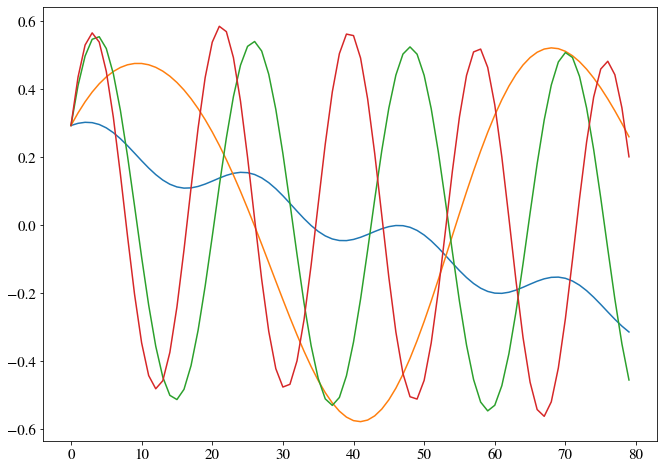

In [34]:
ij=0


plt.plot(Results_array[0+4*ij])
plt.plot(Results_array[1+4*ij])
plt.plot(Results_array[2+4*ij])
plt.plot(Results_array[3+4*ij])

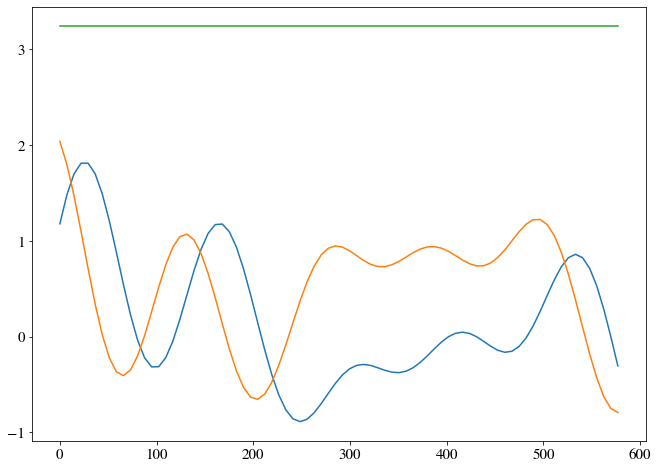

In [35]:
ij=0

plt.plot(t*28.85/0.5,Results_array[0+4*ij]+Results_array[1+4*ij]+Results_array[2+4*ij]+Results_array[3+4*ij])

ij=1

plt.plot(t*28.85/0.5,Results_array[0+4*ij]+Results_array[1+4*ij]+Results_array[2+4*ij]+Results_array[3+4*ij])

ij=2

plt.plot(t*28.85/0.5,Results_array[0+4*ij]+Results_array[1+4*ij]+Results_array[2+4*ij]+Results_array[3+4*ij])

In [36]:
ij=0

Sx=Results_array[0+4*ij]+Results_array[1+4*ij]+Results_array[2+4*ij]+Results_array[3+4*ij]

ij=1

Sy=Results_array[0+4*ij]+Results_array[1+4*ij]+Results_array[2+4*ij]+Results_array[3+4*ij]

ij=2

Sz=Results_array[0+4*ij]+Results_array[1+4*ij]+Results_array[2+4*ij]+Results_array[3+4*ij]



In [37]:
Sx[0]

1.1755705045849465

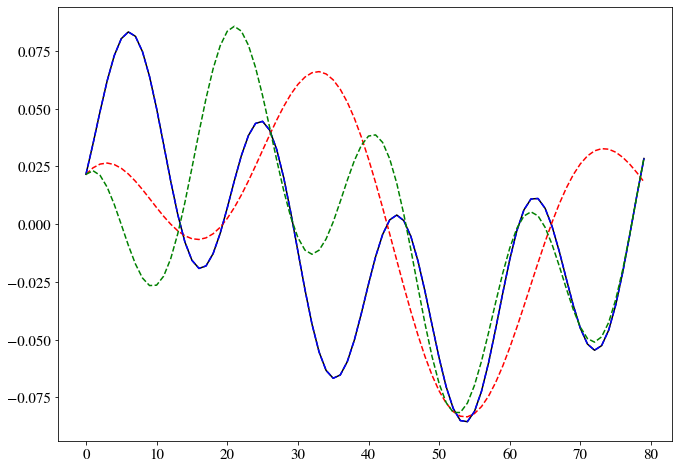

In [38]:
ij=3


plt.plot(Results_array[0+4*ij]/4,"k-")
plt.plot(Results_array[1+4*ij]/4,"r--")
plt.plot(Results_array[2+4*ij]/4,"b--")
plt.plot(Results_array[3+4*ij]/4,"g--")

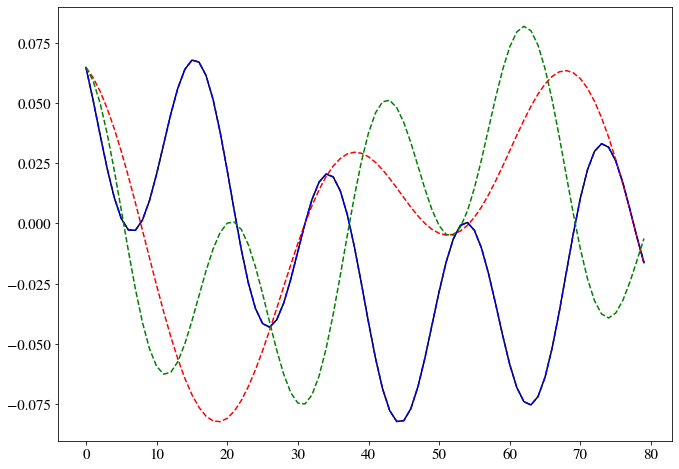

In [39]:
ij=4


plt.plot(Results_array[0+4*ij]/4,"k-")
plt.plot(Results_array[1+4*ij]/4,"r--")
plt.plot(Results_array[2+4*ij]/4,"b--")
plt.plot(Results_array[3+4*ij]/4,"g--")

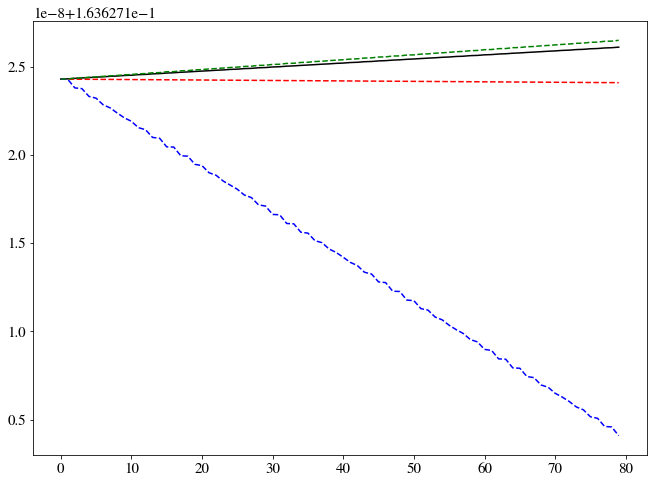

In [40]:
ij=5


plt.plot(Results_array[0+4*ij]/4,"k-")
plt.plot(Results_array[1+4*ij]/4,"r--")
plt.plot(Results_array[2+4*ij]/4,"b--")
plt.plot(Results_array[3+4*ij]/4,"g--")